# Loading data

IMDb review are encoded as Bag of Words and saved in the LIBSVM format.

In [8]:
import glob

In [13]:
pos = glob.glob("../data/large-movie-reviews-dataset/acl-imdb-v1/train/pos/*.txt")

In [14]:
neg = glob.glob("../data/large-movie-reviews-dataset/acl-imdb-v1/train/neg/*.txt")

In [21]:
positives = []
for f in pos:
    with open(f,'r') as file_name:
        positives.append(file_name.readlines()[0])

In [20]:
negatives = []
for f in neg:
    with open(f, 'r') as file_name:
        negatives.append(file_name.readlines()[0])

In [22]:
len(positives)

12500

In [23]:
len(negatives)

12500

In [24]:
positives[0]

'Several features of this film immediately date it. The sound is rather shrill and one realizes what great strides have been accomplished in sound reproduction in the ensuing years. The language of the dialogue is rather quaint and unnatural and the acting is still reminiscent of its transition from the stage techniques.<br /><br />Bette Davis always gives a strong performance in all her films as she does in this early period of her very successful career. I do feel however that somehow the cockney accent does not fit the facial expression. I think it is the assumed cockney accent that does not ring true for me.<br /><br />Somerset Maughan loves to delve into human relationships of great dramatic intensity which will please all movie-goers. As in so many of her character roles, Bette Davis can switch from a beautiful seductive woman to a viper full of fiery hatred. Leslie Howard is well cast as the withdrawn English artist with a club foot desperately seeking a partner and making a bad

In [25]:
negatives[0]

"When I saw this movie, I couldn't believe my eyes. Where these hilarious creatures, dustbin muppets with big pointy teeth, really meant to be scary? Or where they designed to have a good laugh (I sincerely hope so). If you watch carefully you can even see the strings operating them (better; dragging them across the screen). The whole was rather funny than scary and I had a good time watching the movie because I was amazed by its overall incapacity to have only one good part. It is one big joke from beginning to end and I believe this movie belongs into a new category: So unbelievable crappy you'll be laughing from beginning to end. (I'm not even gonna try to comment on the acting or all the other things)"

In [35]:
# merge reviews
reviews = negatives + positives

In [36]:
len(reviews)

25000

In [106]:
# encoding the targets
y = np.append( np.zeros_like(negatives, dtype=np.float32) , np.ones_like(positives, dtype=np.float32) )

In [107]:
y.shape

(25000,)

# Tockenizing

In [37]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [38]:
tfidf = TfidfVectorizer(min_df=2, max_features=10000)

In [39]:
mat = tfidf.fit_transform(reviews).toarray()

In [40]:
mat.shape

(25000, 10000)

In [44]:
tockens = tfidf.get_feature_names()

In [45]:
len(tockens)

10000

# Split train test

In [108]:
test_indices = np.random.choice(np.arange(mat.shape[0]), size=int(mat.shape[0]/5), replace=False)

In [109]:
len(test_indices)

5000

In [110]:
test_indices[:3]

array([ 5651, 23383, 24776])

In [111]:
x_test = mat[test_indices,]
y_test = y[test_indices]

In [112]:
train = np.delete(mat,test_indices, axis=0)
y = np.delete(y, test_indices)

In [113]:
test.shape

(5000, 10000)

In [114]:
train.shape

(20000, 10000)

In [115]:
# validation set
val_indices = np.random.choice(np.arange(train.shape[0]), size=int(train.shape[0]/5), replace=False)

In [116]:
validation = train[val_indices,]
y_val = y[val_indices]

In [117]:
train = np.delete(train, val_indices, axis=0)
y = np.delete(y, val_indices)

In [118]:
validation.shape

(4000, 10000)

In [119]:
train.shape

(16000, 10000)

In [120]:
y.shape

(16000,)

In [121]:
y_val.shape

(4000,)

In [122]:
y_test.shape

(5000,)

# Network

In [83]:
from keras import models, layers

In [84]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [85]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Training

In [124]:
history = model.fit(train,
                   y,
                   epochs=20,
                   batch_size=512,
                   validation_data=(validation, y_val))

Train on 16000 samples, validate on 4000 samples
Epoch 1/20
16000/16000 [==============================] - 0s - loss: 0.6547 - acc: 0.7819 - val_loss: 0.6014 - val_acc: 0.8498
Epoch 2/20
16000/16000 [==============================] - 0s - loss: 0.5413 - acc: 0.8761 - val_loss: 0.4919 - val_acc: 0.8675
Epoch 3/20
16000/16000 [==============================] - 0s - loss: 0.4268 - acc: 0.8949 - val_loss: 0.4015 - val_acc: 0.8727
Epoch 4/20
16000/16000 [==============================] - 0s - loss: 0.3359 - acc: 0.9092 - val_loss: 0.3387 - val_acc: 0.8845
Epoch 5/20
16000/16000 [==============================] - 0s - loss: 0.2690 - acc: 0.9211 - val_loss: 0.2966 - val_acc: 0.8892
Epoch 6/20
16000/16000 [==============================] - 0s - loss: 0.2213 - acc: 0.9319 - val_loss: 0.2733 - val_acc: 0.8935
Epoch 7/20
16000/16000 [==============================] - 0s - loss: 0.1872 - acc: 0.9423 - val_loss: 0.2616 - val_acc: 0.8970
Epoch 8/20
16000/16000 [==============================] - 0s -

# Plotting

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [139]:
def plot_loss(val_loss,loss, epochs):
    plt.plot(epochs, val_loss, '-o', label='validation loss')
    plt.plot(epochs, loss, '-+', label='training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.show()


In [140]:
def plot_acc(val_acc, acc, epochs):
    plt.plot(epochs, val_acc, '-o', label='validation accuracy')
    plt.plot(epochs, acc, '-+', label='training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()


In [141]:
def plot_history(history):
    history.history.keys()
    val_loss = history.history['val_loss']
    loss = history.history['loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(val_loss)+1)
    plot_loss(val_loss, loss, epochs)
    plot_acc(val_acc, acc, epochs)
    

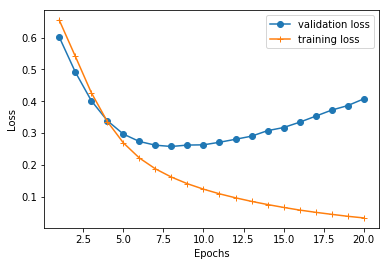

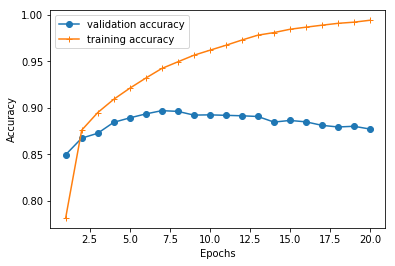

In [142]:
plot_history(history)

# Change layers

In [143]:
# 1 hidden layer
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [144]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [145]:
history = model.fit(train,
                   y,
                   epochs=20,
                   batch_size=512,
                   validation_data=(validation, y_val))

Train on 16000 samples, validate on 4000 samples
Epoch 1/20
16000/16000 [==============================] - 0s - loss: 0.6519 - acc: 0.7719 - val_loss: 0.6130 - val_acc: 0.8440
Epoch 2/20
16000/16000 [==============================] - 0s - loss: 0.5786 - acc: 0.8652 - val_loss: 0.5535 - val_acc: 0.8428
Epoch 3/20
16000/16000 [==============================] - 0s - loss: 0.5156 - acc: 0.8771 - val_loss: 0.4992 - val_acc: 0.8647
Epoch 4/20
16000/16000 [==============================] - 0s - loss: 0.4586 - acc: 0.8863 - val_loss: 0.4517 - val_acc: 0.8680
Epoch 5/20
16000/16000 [==============================] - 0s - loss: 0.4089 - acc: 0.8954 - val_loss: 0.4120 - val_acc: 0.8743
Epoch 6/20
16000/16000 [==============================] - 0s - loss: 0.3668 - acc: 0.9026 - val_loss: 0.3792 - val_acc: 0.8755
Epoch 7/20
16000/16000 [==============================] - 0s - loss: 0.3309 - acc: 0.9097 - val_loss: 0.3523 - val_acc: 0.8790
Epoch 8/20
16000/16000 [==============================] - 0s -

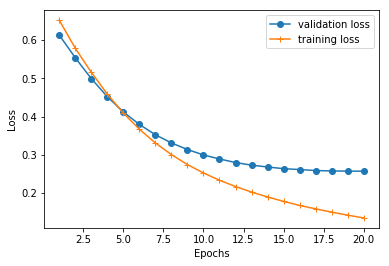

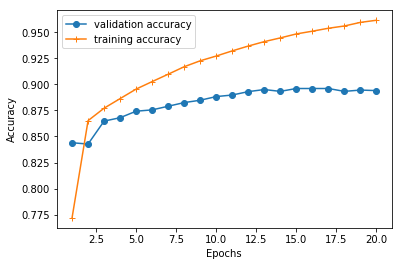

In [146]:
plot_history(history)

In [147]:
# 3 hidden layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [148]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [149]:
history = model.fit(train,
                   y,
                   epochs=20,
                   batch_size=512,
                   validation_data=(validation, y_val),
                   verbose=0)

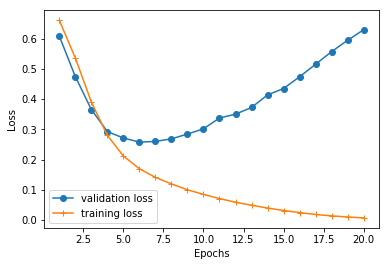

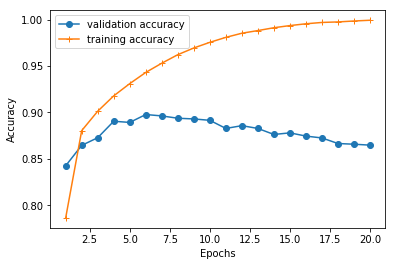

In [150]:
plot_history(history)

## Increase hidden units

### 8 units

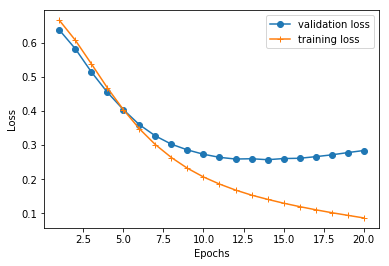

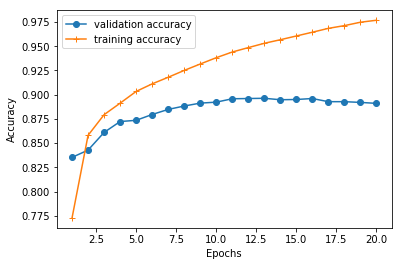

In [159]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(train,
                   y,
                   epochs=20,
                   batch_size=512,
                   validation_data=(validation, y_val),
                   verbose=0)

plot_history(history)

#### 32 units

In [151]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [152]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [153]:
history = model.fit(train,
                   y,
                   epochs=20,
                   batch_size=512,
                   validation_data=(validation, y_val),
                   verbose=0)

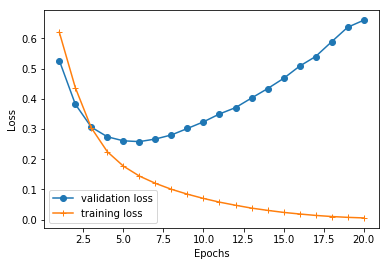

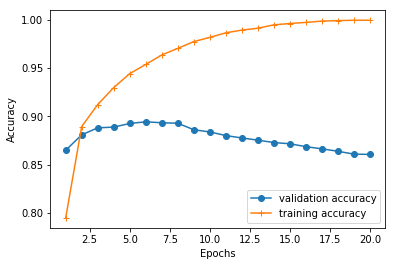

In [154]:
plot_history(history)

### 64 units

In [155]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [156]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [157]:
history = model.fit(train,
                   y,
                   epochs=20,
                   batch_size=512,
                   validation_data=(validation, y_val),
                   verbose=0)

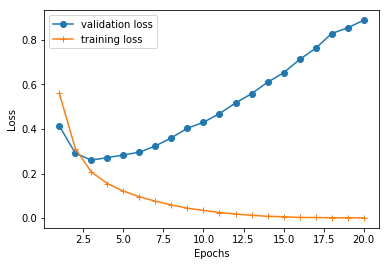

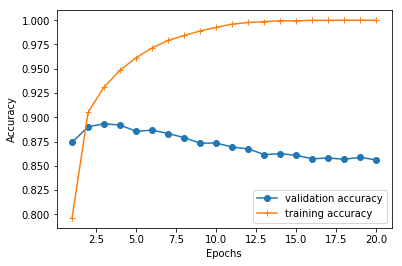

In [158]:
plot_history(history)

# Change loss 

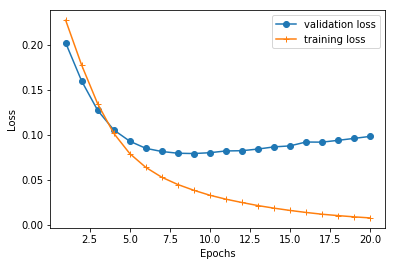

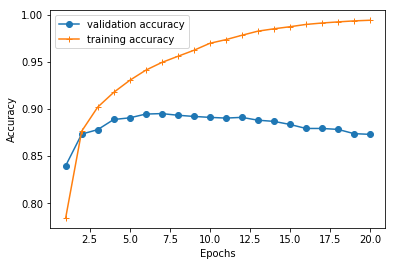

In [160]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

history = model.fit(train,
                   y,
                   epochs=20,
                   batch_size=512,
                   validation_data=(validation, y_val),
                   verbose=0)

plot_history(history)


# Change activation

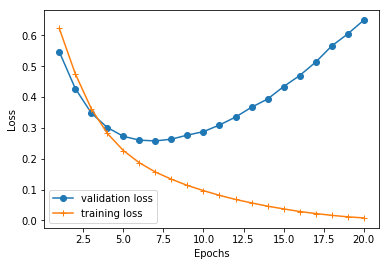

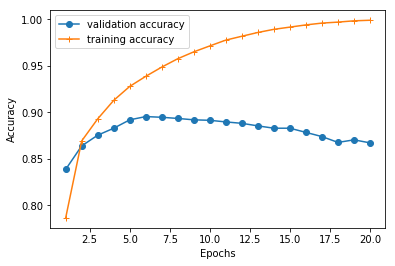

In [161]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(train,
                   y,
                   epochs=20,
                   batch_size=512,
                   validation_data=(validation, y_val),
                   verbose=0)

plot_history(history)

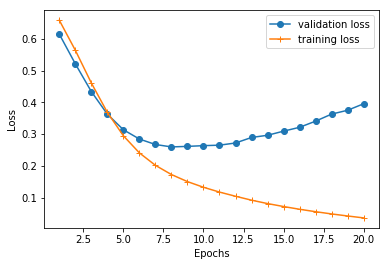

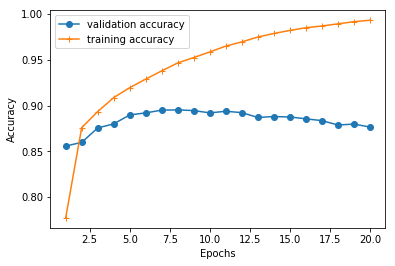

In [162]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(train,
                   y,
                   epochs=20,
                   batch_size=512,
                   validation_data=(validation, y_val),
                   verbose=0)

plot_history(history)